# Data Importing


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

In [33]:
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [34]:
df = pd.read_excel('/content/drive/MyDrive/ML Lab Files/Bonus Project/Dataset.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [36]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [37]:
df.dropna(inplace = True)

# Data Visualisation

## Price Vs. Airline

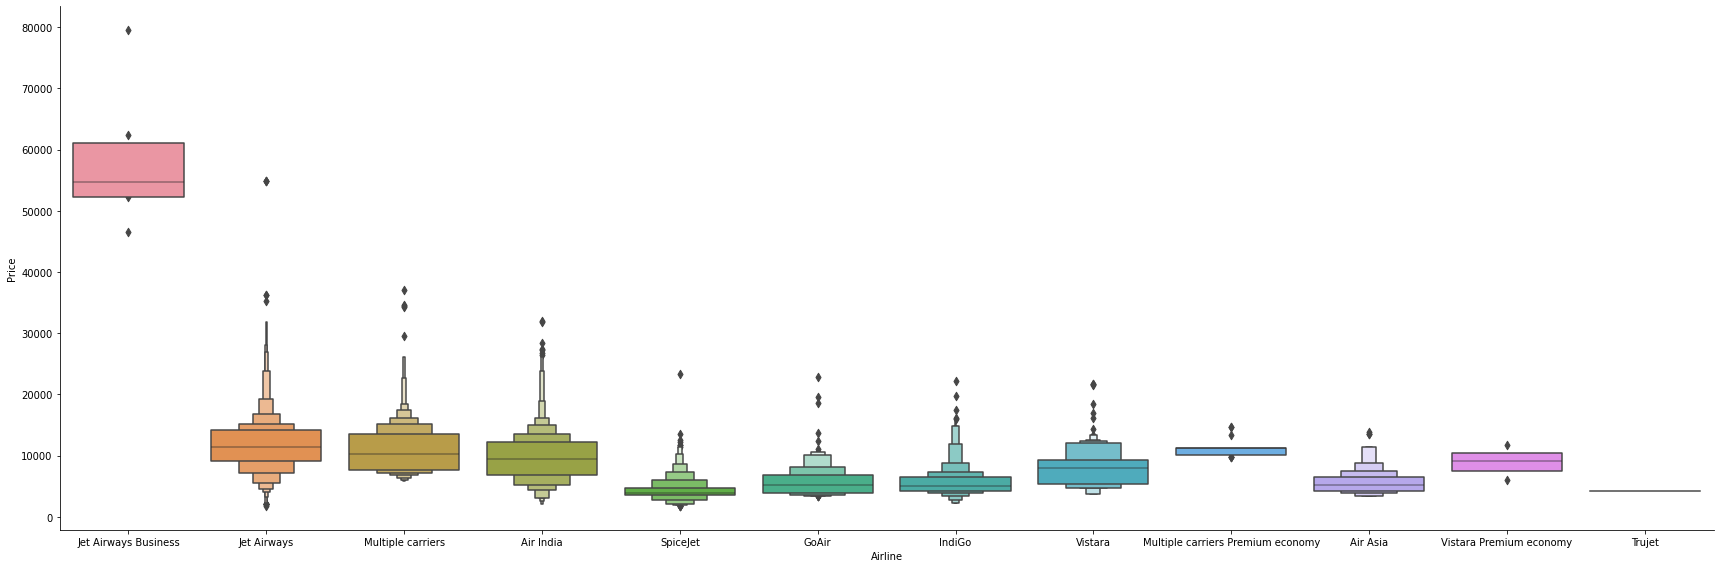

In [38]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

Jett Airways has most outliers in terms of price

## Price Vs. Source

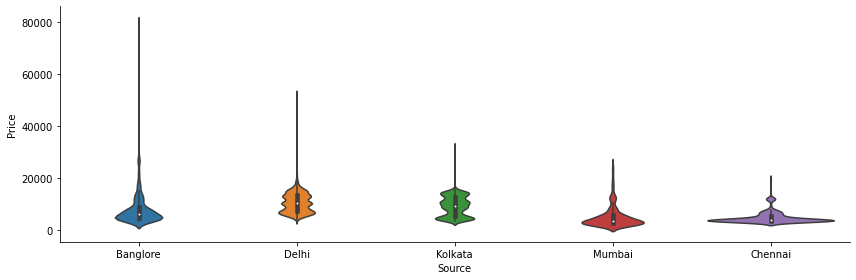

In [39]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

We can see that Banglore has the most outliers and Chennai has the least

## Price Vs. Destination

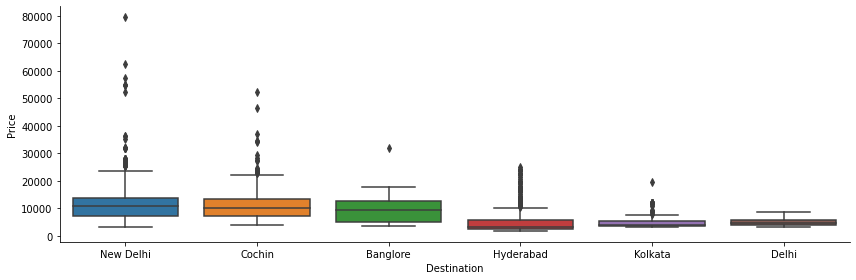

In [40]:
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

New Delhi has most outliers and Banglore has the least

# Pre-Processing(Feature Engineering)

In [41]:
df['Duration'] = df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,180,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,160,non-stop,No info,12648


In [42]:
df["Journey_day"] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df["Journey_month"] = df['Date_of_Journey'].str.split('/').str[1].astype(int)
df.drop(["Date_of_Journey"], axis = 1, inplace = True)
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,180,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,160,non-stop,No info,12648,1,3


In [43]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)
df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,170,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,445,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,1140,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,325,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,285,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,150,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,155,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,180,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,160,non-stop,No info,12648,1,3,11,30


In [44]:
df = df.drop(['Route'], axis = 1)

In [45]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,155,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,180,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,160,non-stop,No info,12648,1,3,11,30,14,10


# Visualisations

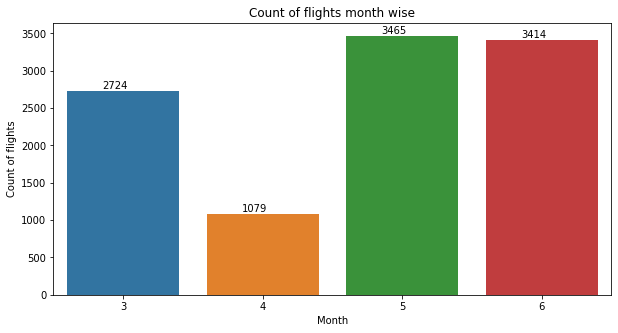

In [46]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

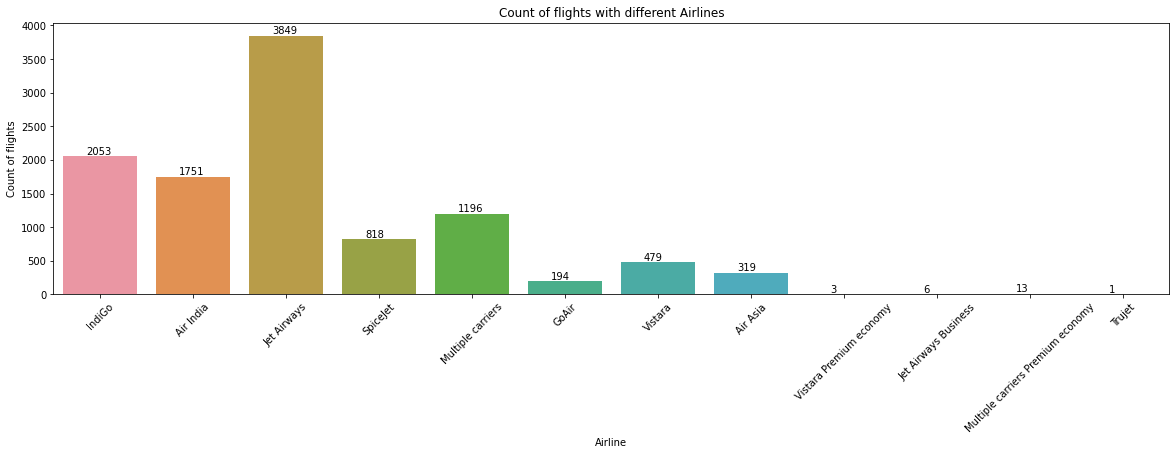

In [47]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

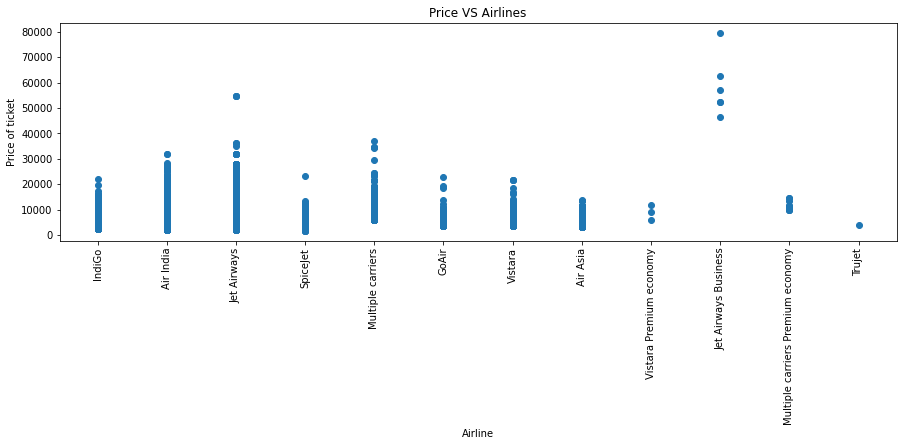

In [48]:
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

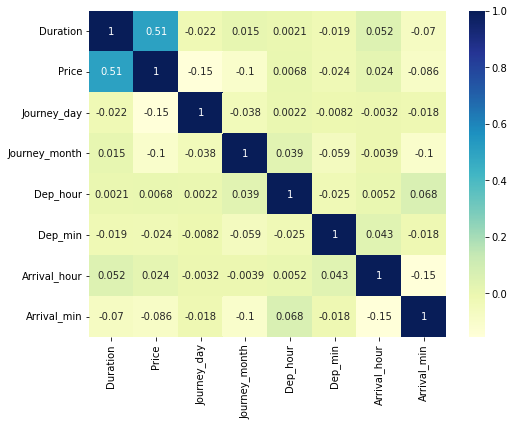

In [49]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Duration         10682 non-null  int64 
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Journey_day      10682 non-null  int64 
 8   Journey_month    10682 non-null  int64 
 9   Dep_hour         10682 non-null  int64 
 10  Dep_min          10682 non-null  int64 
 11  Arrival_hour     10682 non-null  int64 
 12  Arrival_min      10682 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 1.4+ MB


In [51]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,155,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,180,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,160,non-stop,No info,12648,1,3,11,30,14,10


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Duration         10682 non-null  int64 
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Journey_day      10682 non-null  int64 
 8   Journey_month    10682 non-null  int64 
 9   Dep_hour         10682 non-null  int64 
 10  Dep_min          10682 non-null  int64 
 11  Arrival_hour     10682 non-null  int64 
 12  Arrival_min      10682 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 1.4+ MB


In [53]:
feature_categorical_list = df.select_dtypes(include = 'object').keys()
feature_numerical_list = df.select_dtypes(exclude = 'object').keys()

from sklearn.preprocessing import LabelEncoder
lbcode = LabelEncoder()

def encode_categorical(data):
  categorical_list = data.select_dtypes(include = 'object').keys()
  # print(categorical_list)

  for i in range(len(categorical_list)):
    data[categorical_list[i]] = lbcode.fit_transform(data[categorical_list[i]])

encode_categorical(df)
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,170,4,8,3897,24,3,22,20,1,10
1,1,3,0,445,1,8,7662,1,5,5,50,13,15
2,4,2,1,1140,1,8,13882,9,6,9,25,4,25
3,3,3,0,325,0,8,6218,12,5,18,5,23,30
4,3,0,5,285,0,8,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,4,8,4107,9,4,19,55,22,25
10679,1,3,0,155,4,8,4145,27,4,20,45,23,20
10680,4,0,2,180,4,8,7229,27,4,8,20,11,20
10681,10,0,5,160,4,8,12648,1,3,11,30,14,10


# Train-Test Split


In [54]:
from sklearn.model_selection import train_test_split

y = df['Price'].values
x = df.drop('Price', axis = 1).values

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state = 42)

# Models

## Decision Tree Regressor

In [ ]:
model1 = DecisionTreeRegressor()
model1.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred1 = model1.predict(x_test)

In [ ]:
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)
mae1 = mean_absolute_error(y_test, y_pred1)


print('MSE for Model-1 is: ', mse1)
print('r2 score for Model-1 is: ', r2_1)
print('MAE for Model-1 is: ', mae1)

MSE for Model-1 is:  4081553.9985439414
r2 score for Model-1 is:  0.7999329107590234
MAE for Model-1 is:  767.1545501820071


## Random Forest Regressor

In [ ]:
model2 = RandomForestRegressor()
model2.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred2 = model2.predict(x_test)

In [ ]:
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)
mae2 = mean_absolute_error(y_test, y_pred2)


print('MSE for Model-2 is: ', mse2)
print('r2 score for Model-2 is: ', r2_2)
print('MAE score for Model-2 is: ', mae2)

MSE for Model-2 is:  2638658.4821578264
r2 score for Model-2 is:  0.870659870673117
MAE score for Model-2 is:  676.8871477080814


## Linear Regression


In [ ]:
model3 = LinearRegression()
model3.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred3 = model3.predict(x_test)

In [ ]:
mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)
mae3 = mean_absolute_error(y_test, y_pred3)


print('MSE for Model-3 is: ', mse3)
print('r2 score for Model-3 is: ', r2_3)
print('MAE score for Model-3 is: ', mae3)

MSE for Model-3 is:  11256968.97683083
r2 score for Model-3 is:  0.44821285773165
MAE score for Model-3 is:  2450.526462096595


## XGB Regressor


In [ ]:
model4 = XGBRegressor()
model4.fit(x_train, y_train)

[23:32:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred4 = model4.predict(x_test)

In [ ]:
mse4 = mean_squared_error(y_test, y_pred4)
r2_4 = r2_score(y_test, y_pred4)
mae4 = mean_absolute_error(y_test, y_pred4)


print('MSE for Model-4 is: ', mse4)
print('r2 score for Model-4 is: ', r2_4)
print('MAE score for Model-4 is: ', mae4)

MSE for Model-4 is:  3452633.0065634954
r2 score for Model-4 is:  0.8307609709226187
MAE score for Model-4 is:  1241.9508646615395


## LGBM Classifier

In [ ]:
model5 = LGBMRegressor()
model5.fit(x_train, y_train)

LGBMRegressor()

In [ ]:
y_pred5 = model5.predict(x_test)

In [ ]:
mse5 = mean_squared_error(y_test, y_pred5)
r2_5 = r2_score(y_test, y_pred5)
mae5 = mean_absolute_error(y_test, y_pred5)


print('MSE for Model-5 is: ', mse5)
print('r2 score for Model-5 is: ', r2_5)
print('MAE score for Model-5 is: ', mae5)

MSE for Model-5 is:  2444307.3053050996
r2 score for Model-5 is:  0.8801864564434767
MAE score for Model-5 is:  908.5818190217906


## SVR

In [ ]:
model6 = SVR()
model6.fit(x_train, y_train)

SVR()

In [ ]:
y_pred6 = model6.predict(x_test)

In [ ]:
mse6 = mean_squared_error(y_test, y_pred6)
r2_6 = r2_score(y_test, y_pred6)
mae6 = mean_absolute_error(y_test, y_pred6)


print('MSE for Model-6 is: ', mse6)
print('r2 score for Model-6 is: ', r2_6)
print('MAE score for Model-6 is: ', mae6)

MSE for Model-6 is:  17172883.314825162
r2 score for Model-6 is:  0.15823022802156483
MAE score for Model-6 is:  3078.4260064006257


## Deep Neural Networks

In [55]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1664      
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 232,321
Trainable params: 232,321
Non-tr

In [56]:
history = NN_model.fit(x_train, y_train, epochs=500, batch_size=32)

Epoch 1/500
234/234 [==============================] - 2s 5ms/step - loss: 3662.0017 - mean_absolute_error: 3662.0017
Epoch 2/500
234/234 [==============================] - 1s 5ms/step - loss: 2752.2561 - mean_absolute_error: 2752.2561
Epoch 3/500
234/234 [==============================] - 1s 5ms/step - loss: 2528.6121 - mean_absolute_error: 2528.6121
Epoch 4/500
234/234 [==============================] - 1s 5ms/step - loss: 2467.9199 - mean_absolute_error: 2467.9199
Epoch 5/500
234/234 [==============================] - 1s 5ms/step - loss: 2446.5562 - mean_absolute_error: 2446.5562
Epoch 6/500
234/234 [==============================] - 1s 5ms/step - loss: 2423.5408 - mean_absolute_error: 2423.5408
Epoch 7/500
234/234 [==============================] - 1s 5ms/step - loss: 2395.1172 - mean_absolute_error: 2395.1172
Epoch 8/500
234/234 [==============================] - 1s 5ms/step - loss: 2382.7974 - mean_absolute_error: 2382.7974
Epoch 9/500
234/234 [==============================] - 1

In [57]:
y_pred7 = NN_model.predict(x_test)

In [58]:
mse7 = mean_squared_error(y_test, y_pred7)
r2_7 = r2_score(y_test, y_pred7)
mae7 = mean_absolute_error(y_test, y_pred7)


print('MSE for Model-7 is: ', mse7)
print('r2 score for Model-7 is: ', r2_7)
print('MAE score for Model-7 is: ', mae7)

MSE for Model-7 is:  3326487.413738536
r2 score for Model-7 is:  0.8369442975639103
MAE score for Model-7 is:  1059.5277555516284


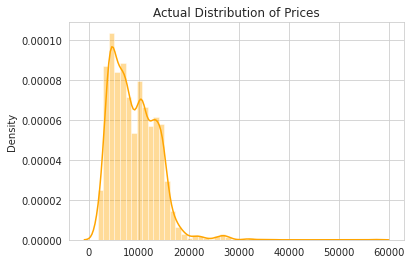

In [63]:
sns.set_style('whitegrid')
sns.distplot(y_test, color = 'orange')
plt.title('Actual Distribution of Prices')
plt.show()

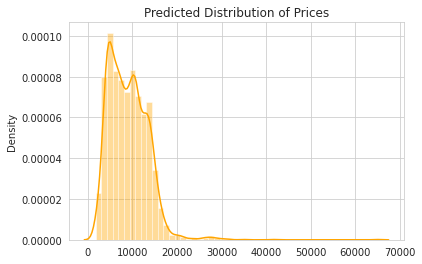

In [64]:
sns.set_style('whitegrid')
sns.distplot(y_pred7, color = 'orange')
plt.title('Predicted Distribution of Prices')
plt.show()

In [65]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

Text(0.5, 1.0, 'Loss variation with epochs')

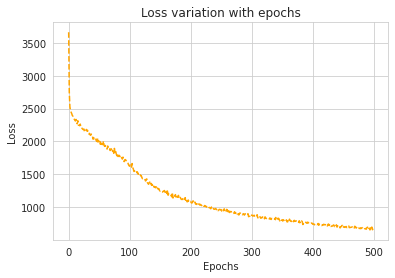

In [66]:
plt.plot(hist['loss'], color = 'orange', linestyle = 'dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss variation with epochs')

# HyperParameter Tuning

## Decision Tree Classifier(Grid Search CV)

In [ ]:
model8 = DecisionTreeRegressor()

params = {"max_depth" : [3,5,7,9],
          "min_samples_leaf":[3,4,5,6,7,8,9],
          "max_leaf_nodes":[None,10,20,30,40,50,60,70] }

clf = GridSearchCV(estimator=model8, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=2, cv = 2)

clf.fit(x_train, y_train)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 2 folds for each of 224 candidates, totalling 448 fits
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=5; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=5; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=6; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=6; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=7; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=7; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=8; total time=   0.0s
[CV] END max_depth=3, max_leaf_node

In [ ]:
model8 = DecisionTreeRegressor(max_depth = 9, max_leaf_nodes = None, min_samples_leaf = 3)
model8.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=3)

In [ ]:
y_pred8 = model8.predict(x_test)

In [ ]:
mse8 = mean_squared_error(y_test, y_pred8)
r2_8 = r2_score(y_test, y_pred8)
mae8 = mean_absolute_error(y_test, y_pred8)


print('MSE for Model-8 is: ', mse8)
print('r2 score for Model-8 is: ', r2_8)
print('MAE score for Model-8 is: ', mae8)

MSE for Model-8 is:  4525253.856829697
r2 score for Model-8 is:  0.7781839055576877
MAE score for Model-8 is:  1161.1463708962267


## Random Forest Regressor(With GridSearchCV)

In [ ]:
model9 = RandomForestRegressor()

params = {'max_depth': [3,4,5,6,7,8,9],  
          'n_estimators': [10,20,30,40,50,60,70,80,90,100,150,200,250,300],
          'max_leaf_nodes': [30,40,50,60,70,80,None]}

clf = GridSearchCV(estimator=model9, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=2, cv = 2)

clf.fit(x_train, y_train)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 2 folds for each of 686 candidates, totalling 1372 fits
[CV] END ....max_depth=3, max_leaf_nodes=30, n_estimators=10; total time=   0.1s
[CV] END ....max_depth=3, max_leaf_nodes=30, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=3, max_leaf_nodes=30, n_estimators=20; total time=   0.1s
[CV] END ....max_depth=3, max_leaf_nodes=30, n_estimators=20; total time=   0.1s
[CV] END ....max_depth=3, max_leaf_nodes=30, n_estimators=30; total time=   0.1s
[CV] END ....max_depth=3, max_leaf_nodes=30, n_estimators=30; total time=   0.1s
[CV] END ....max_depth=3, max_leaf_nodes=30, n_estimators=40; total time=   0.1s
[CV] END ....max_depth=3, max_leaf_nodes=30, n_estimators=40; total time=   0.1s
[CV] END ....max_depth=3, max_leaf_nodes=30, n_estimators=50; total time=   0.2s
[CV] END ....max_depth=3, max_leaf_nodes=30, n_estimators=50; total time=   0.2s
[CV] END ....max_depth=3, max_leaf_nodes=30, n_estimators=60; total time=   0.2s
[CV] END ....max_depth=3, max_leaf_nodes=30, 

In [ ]:
model9 = RandomForestRegressor(max_depth = 9,  max_leaf_nodes = None, n_estimators = 60)
model9.fit(x_train, y_train)

RandomForestRegressor(max_depth=9, n_estimators=60)

In [ ]:
y_pred9 = model9.predict(x_test)

In [ ]:
mse9 = mean_squared_error(y_test, y_pred9)
r2_9 = r2_score(y_test, y_pred9)
mae9 = mean_absolute_error(y_test, y_pred9)


print('MSE for Model-9 is: ', mse9)
print('r2 score for Model-9 is: ', r2_9)
print('MAE score for Model-9 is: ', mae9)

MSE for Model-9 is:  3238548.449690964
r2 score for Model-9 is:  0.8412548353086371
MAE score for Model-9 is:  1016.7668972049502


## Linear Regression(With GridSearchCV)

Linear Regression does not have any hyperparameters to tune

## XGB Regressor(with GridSearchCV)

In [ ]:
model10 = XGBRegressor()

params = {'max_depth': [3,4,5,6,7,8],  
          'learning_rate': [0.1, 0.3, 0.5],
          'n_estimators': [10,30,50,70,90,100,150],
          'subsample': [0.3, 0.5, 0.7]}

clf = GridSearchCV(estimator=model10, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=2, cv = 2)

clf.fit(x_train, y_train)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 2 folds for each of 378 candidates, totalling 756 fits
[23:56:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.3; total time=   0.0s
[23:56:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.3; total time=   0.0s
[23:56:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.5; total time=   0.0s
[23:56:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.5; total time=   0.0s
[23:56:17] WARNING: /workspace/src/objective/regression_obj.c

In [ ]:
model10 = XGBRegressor(max_depth = 9, learning_rate = 0.1, n_estimators = 100, subsample = 0.5)
model10.fit(x_train, y_train)

[00:00:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=9, subsample=0.5)

In [ ]:
y_pred10 = model10.predict(x_test)

In [ ]:
mse10 = mean_squared_error(y_test, y_pred10)
r2_10 = r2_score(y_test, y_pred10)
mae10 = mean_absolute_error(y_test, y_pred10)


print('MSE for Model-10 is: ', mse10)
print('r2 score for Model-10 is: ', r2_10)
print('MAE score for Model-10 is: ', mae10)

MSE for Model-10 is:  2009996.7867428998
r2 score for Model-10 is:  0.9014752207980524
MAE score for Model-10 is:  735.7081425278495


## LGBM Regressor(With GridSearchCV)

In [ ]:
model11 = LGBMRegressor()

params = {'max_depth': [3,4,5,6,7,8,9],  
          'learning_rate': [0.1, 0.3, 0.5],
          'n_estimators': [10,30,50,70,90,100,150],
          'subsample': [0.3, 0.5, 0.7]}

clf = GridSearchCV(estimator=model11, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=2, cv = 2)

clf.fit(x_train, y_train)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 2 folds for each of 441 candidates, totalling 882 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=30, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=30, subsample=0.3; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=30, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=30, subsample=0.5; total time=   0.0s
[CV] END learning

In [ ]:
model11 = LGBMRegressor(max_depth = 7, learning_rate = 0.3, n_estimators = 150, subsample = 0.3)
model11.fit(x_train, y_train)

LGBMRegressor(learning_rate=0.3, max_depth=7, n_estimators=150, subsample=0.3)

In [ ]:
y_pred11 = model11.predict(x_test)

In [ ]:
mse11 = mean_squared_error(y_test, y_pred11)
r2_11 = r2_score(y_test, y_pred11)
mae11 = mean_absolute_error(y_test, y_pred11)


print('MSE for Model-11 is: ', mse11)
print('r2 score for Model-11 is: ', r2_11)
print('MAE score for Model-11 is: ', mae11)

MSE for Model-11 is:  2037756.826086605
r2 score for Model-11 is:  0.9001144963605732
MAE score for Model-11 is:  802.8473974979755


## SVR (With GridSearchCV)

In [ ]:
model12 = SVR()

params = {'C': [0.1, 1, 10, 100],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
          'kernel': ['rbf','sigmoid']}
 
clf = GridSearchCV(estimator=model12, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=2, cv = 2)

clf.fit(x_train, y_train)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 2 folds for each of 40 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.7s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   1.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   1.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   1.0s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   1.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   2.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   2.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   1.0s
[CV] END ..................C=0.1, gamma=0.01, ke

In [ ]:
model12 = SVR(C = 100, gamma = 0.0001, kernel = 'rbf')
model12.fit(x_train, y_train)

SVR(C=100, gamma=0.0001)

In [ ]:
y_pred12 = model12.predict(x_test)

In [ ]:
mse12 = mean_squared_error(y_test, y_pred12)
r2_12 = r2_score(y_test, y_pred12)
mae12 = mean_absolute_error(y_test, y_pred12)


print('MSE for Model-12 is: ', mse12)
print('r2 score for Model-12 is: ', r2_12)
print('MAE score for Model-12 is: ', mae12)

MSE for Model-12 is:  11358923.04527664
r2 score for Model-12 is:  0.44321533626862264
MAE score for Model-12 is:  2223.922728230127


# Summary of Models

We have trained the following models:


1.   Decision Tree Regressor
2.   Random Forest Regressor

1.   Linear Regression
2.   XGB Regressor

1.   LGBM Regressor
2.   SVR

1.   Deep Neural Networks
2.   Decision Tree Regressor(With HyperParameter Tuning)

1.   Random Forest Regressor(With HyperParameter Tuning)
2.   XGB Regressor(With HyperParameter Tuning)

1.   LGBM Regressor(With HyperParameter Tuning)
2.   SVR(With HyperParameter Tuning)














# Comparative Analysis

In [ ]:
r2_score = [r2_8, r2_9, r2_3, r2_10, r2_11, r2_12, r2_7]
mse_score = [mse8, mse9, mse3, mse10, mse11, mse12, mse7]
mae_score = [mae8, mae9, mae3, mae10, mae11, mae12, mae7]
names = ['Decision Tree', 'Random Forest', 'Linear Regression', 'XGB Regressor', 'LGBM Regressor', 'SVR', 'DNN']

## R2 Score

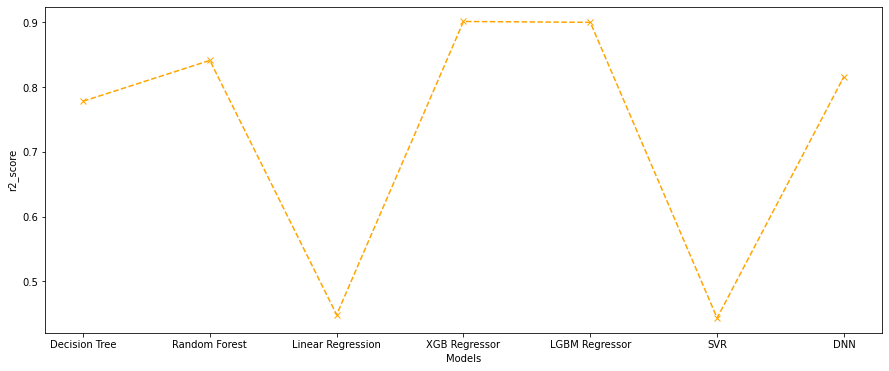

In [ ]:
plt.figure(figsize = (15,6))

plt.plot(names, r2_score, marker = 'x', color = 'orange', linestyle = 'dashed')
plt.xlabel('Models')
plt.ylabel('r2_score')
plt.show()

## Mean Squared Error

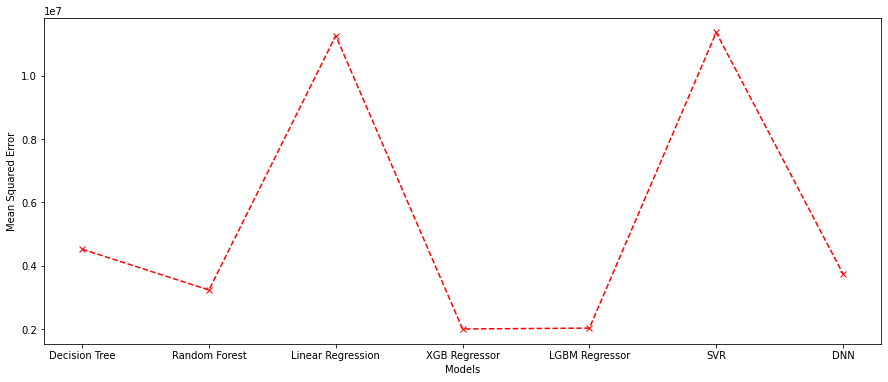

In [ ]:
plt.figure(figsize = (15,6))

plt.plot(names, mse_score, marker = 'x', color = 'red', linestyle = 'dashed')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.show()

## Mean Absolute Error

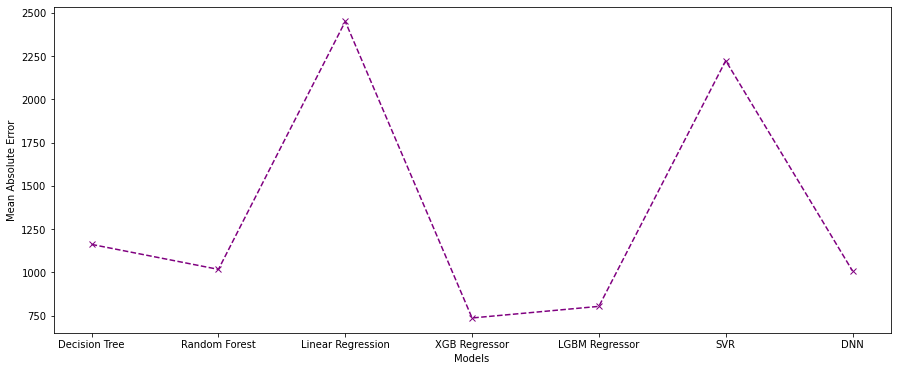

In [ ]:
plt.figure(figsize = (15,6))

plt.plot(names, mae_score, marker = 'x', color = 'purple', linestyle = 'dashed')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.show()

# Exporting the Model

In [ ]:
NN_model.save("flightPrediction.h5")

In [ ]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format keras '/content/flightPrediction.h5' '/content/flightPrediction'

     |████████████████████████████████| 77 kB 4.4 MB/s 
     |████████████████████████████████| 462 kB 27.0 MB/s 
